In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tempfile
import seaborn as sns
import random
sns.set(style="darkgrid")

import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import CollaborativeLearningProtocol, SinglePlayerProtocol
from banditpylib.learners.mab_collaborative_ftbai_learner import LilUCBHeuristicCollaborative
from banditpylib.learners.mab_fcbai_learner import LilUCBHeuristic

In [2]:
means = [(i/10)**0.5 for i in range(1,10)]
random.shuffle(means)

In [3]:
confidence = 0.99
num_learners, rounds, horizon = 10, 5, 20000
param_dict = {
    "rounds": [rounds] * num_learners,
    "horizon": [horizon] * num_learners,
    "num_agents": [2*i + 1 for i in range(num_learners)]
}

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [LilUCBHeuristicCollaborative(num_agents=param_dict["num_agents"][i], 
                                         arm_num=len(arms), 
                                         rounds=param_dict["rounds"][i], 
                                         horizon=param_dict["horizon"][i],
                                         name="learner %d" % (i+1)) for i in range(num_learners)]
trials = 10

In [4]:
game1 = CollaborativeLearningProtocol(bandit=bandit, learners=learners)
temp_file1 = tempfile.NamedTemporaryFile()
game1.play(trials=trials, output_filename=temp_file1.name)
data_df1 = trials_to_dataframe(temp_file1.name)

INFO:absl:start learner 1's play with multi_armed_bandit
INFO:absl:learner 1's play with multi_armed_bandit runs 2.88 seconds.
INFO:absl:start learner 2's play with multi_armed_bandit
INFO:absl:learner 2's play with multi_armed_bandit runs 3.51 seconds.
INFO:absl:start learner 3's play with multi_armed_bandit
INFO:absl:learner 3's play with multi_armed_bandit runs 3.07 seconds.
INFO:absl:start learner 4's play with multi_armed_bandit
INFO:absl:learner 4's play with multi_armed_bandit runs 3.76 seconds.
INFO:absl:start learner 5's play with multi_armed_bandit
INFO:absl:learner 5's play with multi_armed_bandit runs 1.43 seconds.
INFO:absl:start learner 6's play with multi_armed_bandit
INFO:absl:learner 6's play with multi_armed_bandit runs 1.28 seconds.
INFO:absl:start learner 7's play with multi_armed_bandit
INFO:absl:learner 7's play with multi_armed_bandit runs 1.45 seconds.
INFO:absl:start learner 8's play with multi_armed_bandit
INFO:absl:learner 8's play with multi_armed_bandit run

In [5]:
learners = [LilUCBHeuristic(len(arms), confidence)]
game2 = SinglePlayerProtocol(bandit=bandit, learners=learners, horizon=horizon)
temp_file2 = tempfile.NamedTemporaryFile()
game2.play(trials=trials, output_filename=temp_file2.name)
data_df2 = trials_to_dataframe(temp_file2.name)

INFO:absl:start lilUCB_heur's play with multi_armed_bandit
INFO:absl:lilUCB_heur's play with multi_armed_bandit runs 3.85 seconds.


In [6]:
data_df = pd.concat([data_df1, data_df2])
data_df["confidence"] = confidence

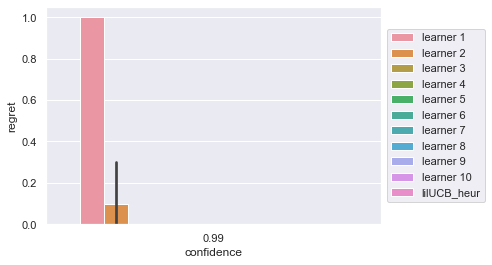

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='regret', hue='learner', data=data_df)
plt.ylabel('regret')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

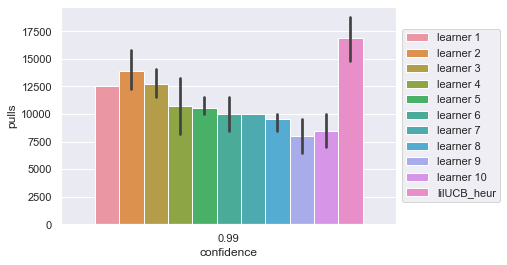

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [9]:
confidence = 0.99
num_learners = 10
rounds1, horizon1 = 3, 20000
rounds2, horizon2 = 10, 20000
param_dict1, param_dict2 = {}, {}
num_agents = [2*i + 1 for i in range(num_learners)]
for i in range(num_learners):
  param_dict1[i] = {"rounds": rounds1, "horizon": horizon1, "num_agents": num_agents[i]}
  param_dict2[i] = {"rounds": rounds2, "horizon": horizon2, "num_agents": num_agents[i]}

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = MultiArmedBandit(arms=arms)

learners1 = [LilUCBHeuristicCollaborative(num_agents=param_dict1[i]["num_agents"],
                                          arm_num=len(arms),
                                          rounds=param_dict1[i]["rounds"],
                                          horizon=param_dict1[i]["horizon"],
                                          name="learner1 %d" % (i+1)) for i in range(num_learners)]

learners2 = [LilUCBHeuristicCollaborative(num_agents=param_dict2[i]["num_agents"],
                                          arm_num=len(arms),
                                          rounds=param_dict2[i]["rounds"],
                                          horizon=param_dict2[i]["horizon"],
                                          name="learner2 %d" % (i+1)) for i in range(num_learners)]

trials = 10

In [10]:
game1 = CollaborativeLearningProtocol(bandit=bandit, learners=learners1)
temp_file3 = tempfile.NamedTemporaryFile()
game1.play(trials=trials, output_filename=temp_file3.name)
data_df1 = trials_to_dataframe(temp_file3.name)
game2 = CollaborativeLearningProtocol(bandit=bandit, learners=learners2)
temp_file4 = tempfile.NamedTemporaryFile()
game2.play(trials=trials, output_filename=temp_file4.name)
data_df2 = trials_to_dataframe(temp_file4.name)

INFO:absl:start learner1 1's play with multi_armed_bandit
INFO:absl:learner1 1's play with multi_armed_bandit runs 3.30 seconds.
INFO:absl:start learner1 2's play with multi_armed_bandit
INFO:absl:learner1 2's play with multi_armed_bandit runs 4.52 seconds.
INFO:absl:start learner1 3's play with multi_armed_bandit
INFO:absl:learner1 3's play with multi_armed_bandit runs 3.19 seconds.
INFO:absl:start learner1 4's play with multi_armed_bandit
INFO:absl:learner1 4's play with multi_armed_bandit runs 2.44 seconds.
INFO:absl:start learner1 5's play with multi_armed_bandit
INFO:absl:learner1 5's play with multi_armed_bandit runs 1.02 seconds.
INFO:absl:start learner1 6's play with multi_armed_bandit
INFO:absl:learner1 6's play with multi_armed_bandit runs 1.14 seconds.
INFO:absl:start learner1 7's play with multi_armed_bandit
INFO:absl:learner1 7's play with multi_armed_bandit runs 1.35 seconds.
INFO:absl:start learner1 8's play with multi_armed_bandit
INFO:absl:learner1 8's play with multi_

In [11]:
def get_rounds_from_learner_name(learner):
  i = int(learner.split()[0][-1])
  if i==1:
    return rounds1
  return rounds2

def get_num_agents_from_learner_name(learner):
  i = int(learner.split()[-1])
  return num_agents[i-1]

In [12]:
num_agents

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [13]:
data_df = pd.concat([data_df1, data_df2])
data_df["rounds"] = data_df["learner"].apply(get_rounds_from_learner_name)
data_df["num_agents"] = data_df["learner"].apply(get_num_agents_from_learner_name)

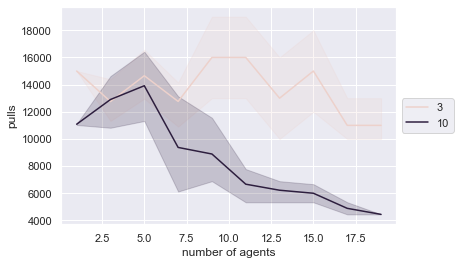

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(x='num_agents', y='total_actions', hue='rounds', data=data_df)
plt.ylabel('pulls')
plt.xlabel('number of agents')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

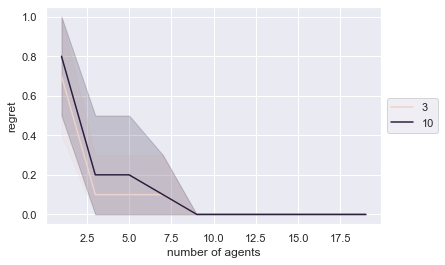

In [15]:
fig = plt.figure()
ax = plt.subplot(111)
sns.lineplot(x='num_agents', y='regret', hue='rounds', data=data_df)
plt.ylabel('regret')
plt.xlabel('number of agents')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()